# Monte Carlo Option Pricing – Basic European Call

This notebook demonstrates the fundamental Monte Carlo simulation approach to pricing a European Call option using **Geometric Brownian Motion (GBM)** under the **risk-neutral measure**.

### 📌 Objectives
1. Implement single-step Monte Carlo pricing (path independent).
2. Compare the Monte Carlo estimated price with the Black-Scholes analytical formula.
3. Visualize the distribution of simulated terminal stock prices.

### 🔍 Concept Summary

Under the **risk-neutral world**, stock prices follow:

$$
dS_t = rS_t\,dt + \sigma S_t\,dW_t
$$

The discretized form for terminal price:

$$
S_T = S_0 \cdot \exp \left( (r - 0.5\sigma^2)T + \sigma \sqrt{T} Z \right), 
\quad Z \sim \mathcal{N}(0,1)
$$

The Monte Carlo estimate of a **European Call option** is:

$$
C = e^{-rT} \cdot \mathbb{E}[\max(S_T - K, 0)]
$$

### Import Libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### Define Parameters

In [9]:
S0 = 100     # initial stock price
K = 105      # strike price
r = 0.05     # risk-free rate
sigma = 0.2  # volatility
T = 1.0      # time to maturity (1 year)
n_sim = 10000  # number of simulated paths

### GBM Simulation

In [10]:
# Single step Monte Carlo simulation (no time slicing)
Z = np.random.normal(0, 1, n_sim)
ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

### Compute Payoff & Price

In [11]:
payoffs = np.maximum(ST - K, 0)
mc_price = np.exp(-r * T) * np.mean(payoffs)
print("Monte Carlo Price:", mc_price)

Monte Carlo Price: 8.211001783309973


### Black–Scholes Analytical Price

In [12]:
# Black-Scholes price calculation
d1 = (np.log(S0/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
d2 = d1 - sigma*np.sqrt(T)
bs_price = S0 * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)
print("Black-Scholes Price:", bs_price)

Black-Scholes Price: 8.021352235143176


### Visualization

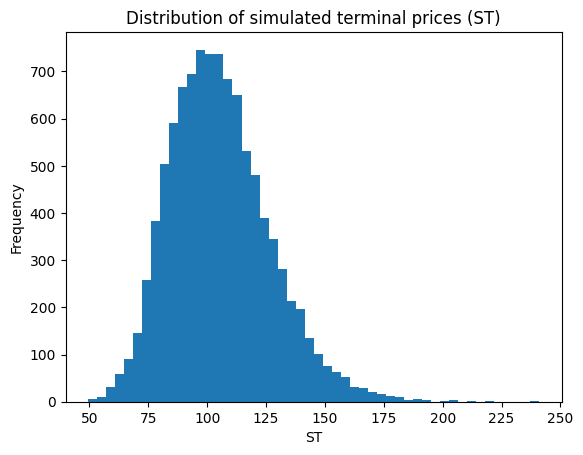

Monte Carlo Price: 8.2110
Black-Scholes Price: 8.0214
Difference: 0.1896


In [13]:
plt.hist(ST, bins=50)
plt.title("Distribution of simulated terminal prices (ST)")
plt.xlabel("ST")
plt.ylabel("Frequency")
plt.show()

print(f"Monte Carlo Price: {mc_price:.4f}")
print(f"Black-Scholes Price: {bs_price:.4f}")
print(f"Difference: {abs(mc_price - bs_price):.4f}")

### Observations
- Monte Carlo estimation converges toward Black–Scholes as simulation count increases.
- This version uses **single-step GBM simulation**, valid only for **path-independent options** (European).
- Results are close but may vary slightly due to randomness.

### Next Steps
| Feature | Description |
|--------|-------------|
| **Time discretization** | Needed for path-dependent options (e.g., Asian) |
| **Variance Reduction Techniques** | Antithetic variates, control variates |
| **Greek Estimation** | Delta, Vega via finite difference |
| **Performance Optimization** | Vectorization, Numba, C++ backend |


### Project Insight
> This notebook illustrates the core intuition of Monte Carlo option pricing.  
> In the full project, the simulation logic is modularized in `src/`, and this notebook is used for experimentation and visualization.

_Next notebook: `02_vectorized_vs_nonvectorized.ipynb`_